# Building an image classifier using the Sequential API

Example follows text: pp. 297-307

Import required packages

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import pandas as pd

# For drawing the MNIST digits as well as plots to help us evaluate performance we
# will make extensive use of matplotlib
from matplotlib import pyplot as plt

Load the data set. We will be using the Fashion MNIST data set, which is an alternate to the traditional MNIST data set. Instead of digits, we will be classifying various fashion articles (i.e., clothes). The data set contains 70,000 grayscale images that are 28 x 28 pixels each in 10 classes. 

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

# Training images is a list of 60,000 2D tensors.
# Each 2D tensor is 28 by 28.
# Each item in the 2D array is an integer from 0 to 255 representing its grayscale
# intensity where 0 means white, 255 means black.
print(len(x_train_full), x_train_full[0].shape)

# training_labels are a value between 0 and 9 indicating which digit is represented.
# The first item in the training data is a 5
print(len(y_train_full), y_train_full[0])

60000 (28, 28)
60000 9


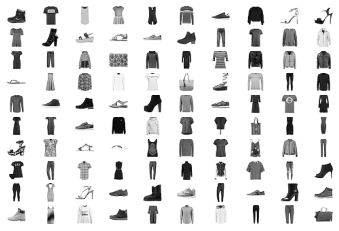

In [3]:
# We can visualize some of the images from the data set
for i in range(100):
    ax = plt.subplot(10, 10, i+1)
    ax.axis('off')
    plt.imshow(x_train_full[i], cmap='Greys')

Establish a validation set and readable class labels for simpler analysis

In [4]:
# We have our data set split into a training set and a test set. However, there is no validation set.
# Simultaneously, we will scale our inputs to range [0, 1] since we will be using a gradient descent
x_valid, x_train = x_train_full[:5000]/255.0, x_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# Unlike the MNIST database, the output from the fashion MNIST database needs interpretable labels.
# Next, we apply labels to the numerical output we expect from our model
class_names = ["T-shirt", "Pants", "Sweater", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
print('Label for 1st training image: ' + str(class_names[y_train[0]]) + '\n')
print('Label for 5,001st image from the full set: ' + str(class_names[y_train_full[5000]]) + '\n')

Label for 1st training image: Coat

Label for 5,001st image from the full set: Coat



In [9]:
# Now we'll create a "Sequential" model, which is a single stack of layers connected sequentially. We could do
# this as a single line passing the layers as parameters in the sequential statement below:
model = keras.models.Sequential()

# Build the first layer and add it to the model. The "Flatten" layer converts each input image into a 1D array.
#model.add(keras.layers.Flatten(input_shape=[28,28]))


# Manually Flatten
# 28 x 28 = 784, because that's the dimensions of the MNIST data.
image_size = 784

# Reshaping the training_images and test_images to lists of vectors with length 784
# instead of lists of 2D arrays. Same for the test_images
training_data = x_train.reshape(x_train.shape[0], image_size) 
test_data = x_test.reshape(x_test.shape[0], image_size)
valid_data = x_valid.reshape(x_valid.shape[0], image_size)



# We add the hidden layers to them model. We will have 2 "Dense" layers (recall, a dense layer connects each  
# neuron with the all neurons in the next layer), each with a "Relu" activation function
# The first will have 300 neurons, the second will have 100
model.add(keras.layers.Dense(300, activation="relu",input_shape=(image_size,)))
model.add(keras.layers.Dense(100, activation="relu"))

# The final layer is the output layer. We have 1 node for each class. We will use the "softmax" activation 
# the classes are exclusive
model.add(keras.layers.Dense(10, activation="softmax"))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 300)               235500    
                                                                 
 dense_8 (Dense)             (None, 100)               30100     
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Compile the model to specify the "loss" function and "optimizer"
# For explanation of the parameters chosen, see text pp. 302-303
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=keras.optimizers.SGD(learning_rate=1e-3), 
              metrics=['accuracy'])

In [11]:
# Train the model using the model's "fit" function and specifying the training data, training labels,
# epochs, and output
#history = model.fit(x_train, y_train, epochs = 10, validation_data=(x_valid, y_valid), verbose=2)

# Use with manually flattened data
history = model.fit(training_data, y_train, epochs = 10, validation_data=(valid_data, y_valid), verbose=2)

Epoch 1/10
1719/1719 - 6s - loss: 1.4629 - accuracy: 0.5482 - val_loss: 0.9891 - val_accuracy: 0.7000 - 6s/epoch - 4ms/step
Epoch 2/10
1719/1719 - 4s - loss: 0.8693 - accuracy: 0.7214 - val_loss: 0.7622 - val_accuracy: 0.7592 - 4s/epoch - 3ms/step
Epoch 3/10
1719/1719 - 5s - loss: 0.7235 - accuracy: 0.7664 - val_loss: 0.6677 - val_accuracy: 0.7908 - 5s/epoch - 3ms/step
Epoch 4/10
1719/1719 - 4s - loss: 0.6498 - accuracy: 0.7877 - val_loss: 0.6133 - val_accuracy: 0.8072 - 4s/epoch - 3ms/step
Epoch 5/10
1719/1719 - 5s - loss: 0.6028 - accuracy: 0.8023 - val_loss: 0.5755 - val_accuracy: 0.8132 - 5s/epoch - 3ms/step
Epoch 6/10
1719/1719 - 5s - loss: 0.5702 - accuracy: 0.8115 - val_loss: 0.5498 - val_accuracy: 0.8208 - 5s/epoch - 3ms/step
Epoch 7/10
1719/1719 - 5s - loss: 0.5464 - accuracy: 0.8180 - val_loss: 0.5255 - val_accuracy: 0.8268 - 5s/epoch - 3ms/step
Epoch 8/10
1719/1719 - 5s - loss: 0.5272 - accuracy: 0.8232 - val_loss: 0.5143 - val_accuracy: 0.8306 - 5s/epoch - 3ms/step
Epoch 9/

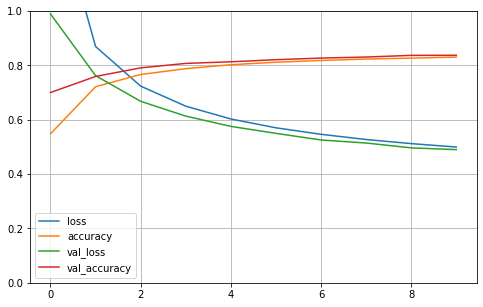

In [12]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) #sets vertical range to [0,1]
plt.show()

The plot above shows that the accuracy (training and validation) increase with each epoch. Moreover, the loss (training and validation decrease with each epoch. Note: the training loss is computed during the epoch, while the validation loss is computed at the end. A more accurate plot of loss would shift the training loss 1/2 epoch to the left.

In addition, the training and validation accuracies are close together, which is an indication that the model has not been overfit (too much).

Now that the model has been trained, we move to using the model for prediction on "new" data.

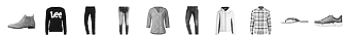

In [18]:
# We will make predictions on the first 3 instances of the test data.
# First, let's grab the first 10 images
x_new = test_data[:10]

# We can visualize the images to see what we're working with
for i in range(10):
    ax = plt.subplot(1, 10, i+1)
    ax.axis('off')
    plt.imshow(x_test[i], cmap='Greys')

In [19]:
# We can also view the correct category for each (remember, we index from 0)
y_test[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [20]:
# Or maybe simpler by label name
np.array(class_names)[y_test[:10]]

array(['Ankle boot', 'Sweater', 'Pants', 'Pants', 'Shirt', 'Pants',
       'Coat', 'Shirt', 'Sandal', 'Sneaker'], dtype='<U10')

In [21]:
# Now we can use the model's "predict" function to classify the images
# The "predict function will provide the probabilities that the image is classified in the various categories"
y_prob = model.predict(x_new)
#print(y_prob.round(2))
y_prob.round(2)

1/1 [==============================] - 0s 56ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [22]:
# We can limit the model to predicting the category with the highest probability 
y_pred = np.argmax(model.predict(x_new), axis=-1)
np.array(class_names)[y_pred]

1/1 [==============================] - 0s 18ms/step


array(['Ankle boot', 'Sweater', 'Pants', 'Pants', 'Shirt', 'Pants',
       'Coat', 'Coat', 'Sneaker', 'Sneaker'], dtype='<U10')